In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bank_note_data.csv")

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
features = list(data.columns)[:-1]
target = list(data.columns)[:-1]

## Scaling data

In [8]:
from sklearn.preprocessing import StandardScaler

data_norm = data.copy()
sc = StandardScaler()
data_norm[features] = sc.fit_transform(data[features])

In [9]:
data_norm

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


## TSNE

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=500, n_components = 2)

x_tsne = tsne.fit_transform(data_norm[features])

In [12]:
x_tsne

array([[-28.819801, -25.779907],
       [-26.82279 , -29.37888 ],
       [ 37.071777, -29.899214],
       ...,
       [ 60.413616,  16.214188],
       [ 52.00146 ,  14.781543],
       [ 18.672264,  34.96175 ]], dtype=float32)

In [13]:
y = data[target]

In [14]:
y

,Image.Var,Image.Skew,Image.Curt,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


## Visualisation

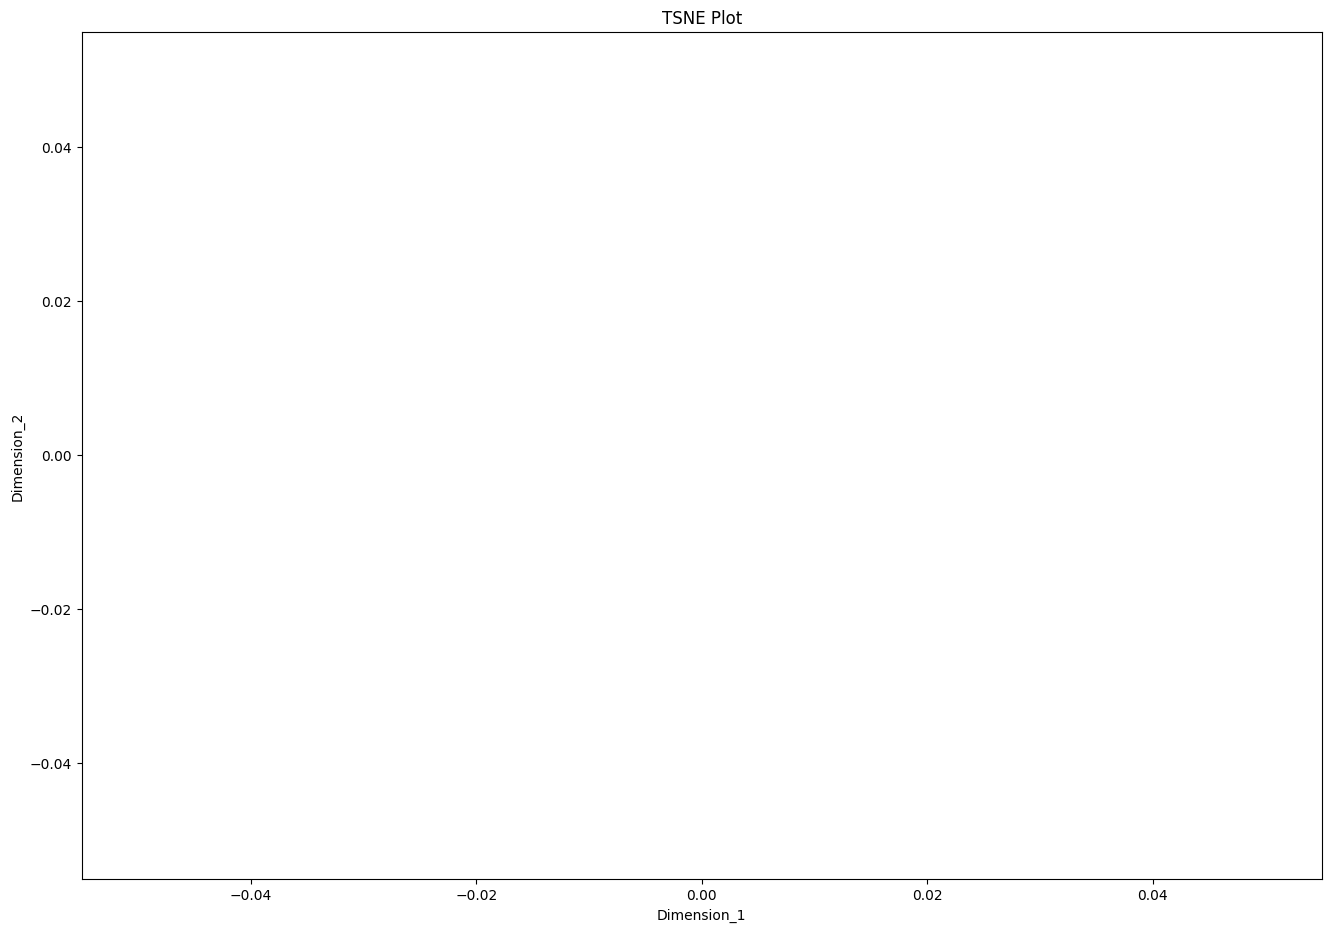

In [16]:
plt.figure(figsize=(16,11))
plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1], color = 'g', marker = "^")
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1], color = 'r', marker = "*")
plt.xlabel("Dimension_1")
plt.ylabel("Dimension_2")
plt.title("TSNE Plot")
plt.show()

In [17]:
x_tsne[np.where(y==0)]

array([], dtype=float32)

In [18]:
x_tsne[np.where(y==1)]

array([], dtype=float32)